In [1]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.38MB/s]


In [3]:
! unzip customer-segmentation-tutorial-in-python.zip

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Step 1: Import the required libraries**

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Load and preprocess the dataset**

In [7]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**removing unecessary columns :**

In [9]:
df.drop('CustomerID', axis=1, inplace=True)

The ID column typically represents a unique identifier for each data point, such as a customer ID. In the context of clustering, this column does not provide any meaningful information for the clustering algorithm since it is just an arbitrary identifier.
Including the ID column in the clustering process would not add any value and may even introduce noise or bias into the clustering results.
Therefore, it is common practice to remove the ID column before performing clustering to focus on the relevant features that contribute to the clustering patterns.

note : Some times it may not be a good idea to remove th ID column for example when there is an analysis requirements, if you need to link the segmentation results back to individual customers in subsequent analysis or reporting, it may be beneficial to keep the ID column. However, this should be considered on a case-by-case basis, and alternate identifiers or grouping mechanisms can often be used instead.

In [10]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


**Perform feature scaling**

In [12]:
# Standardize the numeric features (Annual Income and Spending Score)
scaler = StandardScaler()
df[['Age' , 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age' , 'Annual Income (k$)', 'Spending Score (1-100)']])

By scaling the data, we remove the scale differences and allows the clustering algorithm to give equal importance to all features.
Sclaing helps prevent features with larger scales from dominating the clustering process and ensures that all features contribute proportionately to the distance calculations used by clustering algorithms.

In [13]:
from sklearn.cluster import KMeans

**Step 4: Explore the dataset**

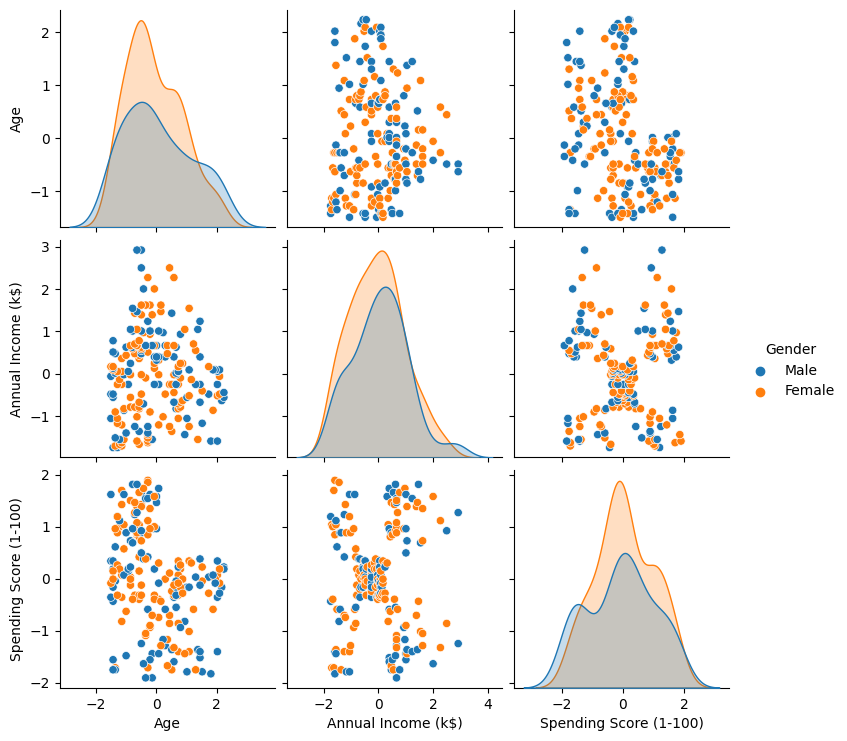

In [14]:
sns.pairplot(df, hue='Gender')
plt.show()

as we can see , the diagonal of the pairplot matrix will is displaying kernel densities plot for each individual variable, showing its distribution , the other plot are showing the relationship between variables and we can tell that there is no clear relations

# Clustering :
<h3>1. K_Means</h3>

In [15]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

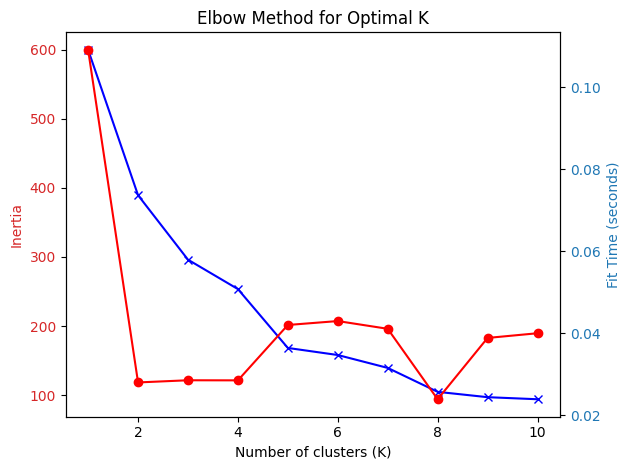

In [16]:
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
fit_times = []
K = range(1, 11)

for k in K:
    start_time = time.time()

    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)

    end_time = time.time()
    fit_time = end_time - start_time

    inertia.append(kmeans.inertia_)
    fit_times.append(fit_time)

# Plot the elbow curve
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(K, inertia, 'bx-')
ax1.set_xlabel('Number of clusters (K)')
ax1.set_ylabel('Inertia', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(K, fit_times, 'ro-')
ax2.set_ylabel('Fit Time (seconds)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow Method for Optimal K')

fig.tight_layout()
plt.show()

note : kmeans.inertia_ also (distortion score) is an attribute in scikit-learn's K-means clustering algorithm that represents the sum of squared distances of samples to their closest cluster center. It provides a measure of how well the samples within each cluster are grouped together.

In K-means clustering, the algorithm aims to minimize the within-cluster inertia or the total within-cluster sum of squares. It achieves this by iteratively assigning data points to the nearest cluster centroid and updating the centroids to minimize the inertia.

After fitting a K-means model to the data, you can access the inertia value using the inertia_ attribute of the fitted model. The lower the inertia value, the better the clustering performance, as it indicates that the data points within each cluster are closer to their respective cluster centroids.

In [17]:
kmeans = KMeans(n_clusters = 2, random_state = 42 , n_init = 'auto')
kmeans.fit(X)
kmeans.inertia_

389.3861889564371

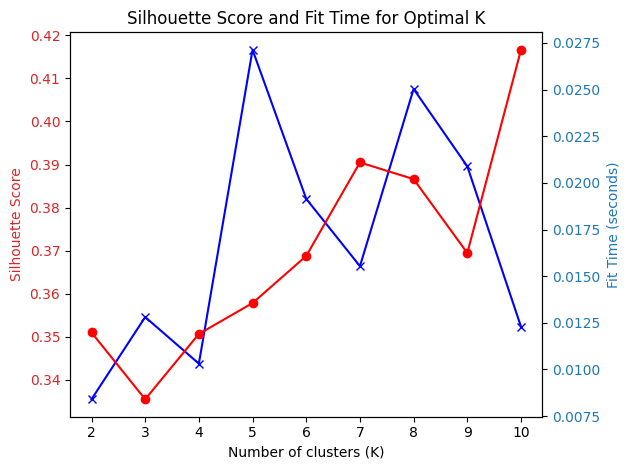

In [18]:
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

K = range(2, 11)
silhouette_scores = []
fit_times = []

for k in K:
    start_time = time.time()

    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)

    end_time = time.time()
    fit_time = end_time - start_time

    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)

    silhouette_scores.append(silhouette_avg)
    fit_times.append(fit_time)

# Plot the silhouette scores
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(K, silhouette_scores, 'bx-')
ax1.set_xlabel('Number of clusters (K)')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(K, fit_times, 'ro-')
ax2.set_ylabel('Fit Time (seconds)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Silhouette Score and Fit Time for Optimal K')

fig.tight_layout()
plt.show()


The silhouette metric is a measure of how well each sample in a cluster is assigned to its cluster compared to other clusters. It provides a way to evaluate the quality of clustering results by considering both the cohesion (how similar the samples are within a cluster) and the separation (how distinct the clusters are from each other).

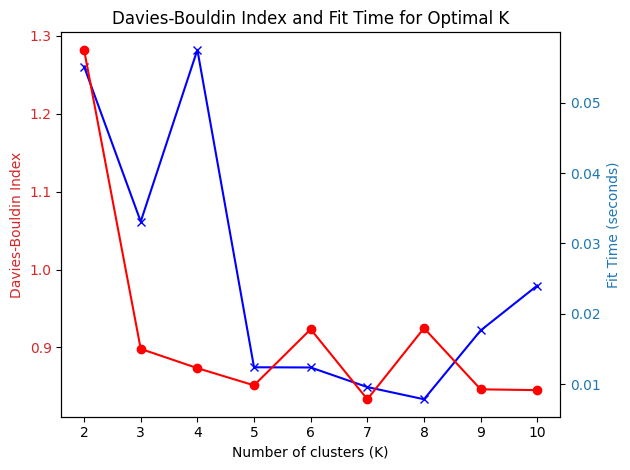

In [19]:
import time
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score , calinski_harabasz_score
import matplotlib.pyplot as plt

K = range(2, 11)
davies_bouldin_scores = []
fit_times = []

for k in K:
    start_time = time.time()

    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)

    end_time = time.time()
    fit_time = end_time - start_time

    labels = kmeans.labels_
    davies_bouldin_index = davies_bouldin_score(X, labels)

    davies_bouldin_scores.append(davies_bouldin_index)
    fit_times.append(fit_time)

# Plot the Davies-Bouldin Index
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(K, davies_bouldin_scores, 'bx-')
ax1.set_xlabel('Number of clusters (K)')
ax1.set_ylabel('Davies-Bouldin Index', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(K, fit_times, 'ro-')
ax2.set_ylabel('Fit Time (seconds)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Davies-Bouldin Index and Fit Time for Optimal K')

fig.tight_layout()
plt.show()


Davies-Bouldin Index: The Davies-Bouldin Index assesses the average similarity between clusters, considering both the within-cluster scatter and the between-cluster separation. It is defined as the average ratio of the distances between each cluster centroid and the centroids of other clusters. Lower index values indicate better-defined and well-separated clusters.

In [20]:
clusters = KMeans(n_clusters=6, init='k-means++', n_init = 'auto').fit(X)
clustered = X.copy()
clustered.loc[:,'cluster'] = clusters.labels_

In [21]:
clusters

KMeans(n_clusters=6, n_init='auto')

In [22]:
clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     200 non-null    float64
 1   Annual Income (k$)      200 non-null    float64
 2   Spending Score (1-100)  200 non-null    float64
 3   cluster                 200 non-null    int32  
dtypes: float64(3), int32(1)
memory usage: 5.6 KB


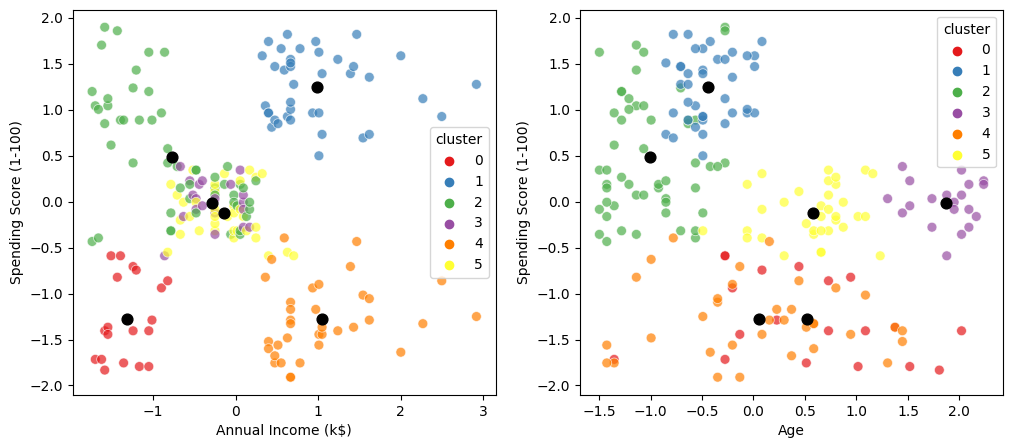

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

scatterplot_income_score = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                                           data=clustered, hue='cluster',
                                           ax=axes[0], palette='Set1', legend='full',
                                           alpha=0.7, s=50)

scatterplot_age_score = sns.scatterplot(x='Age', y='Spending Score (1-100)',
                                        data=clustered, hue='cluster',
                                        ax=axes[1], palette='Set1', legend='full',
                                        alpha=0.7, s=50)

axes[0].scatter(clusters.cluster_centers_[:, 1], clusters.cluster_centers_[:, 2],
                marker='o', s=60, c="black", edgecolors='black')

axes[1].scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 2],
                marker='o', s=60, c="black", edgecolors='black')

axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Spending Score (1-100)')

plt.show()


since it is only a 2d representation it is nearly impossible to differentiate between the cluster instances for the first plot , but viewing the second we can tell that it is performing quite well in separating

In [24]:
labels = clusters.labels_

# Evaluate the model
inertia = clusters.inertia_
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Inertia: 149.39171491141195
Silhouette Score: 0.3926245613672707
Davies-Bouldin Index: 0.8441407683846657
Calinski-Harabasz Index: 117.03193494903546


The evaluation metrics provide the following insights about your clustering model:

- Inertia: The inertia value of 1353.3270352603136 indicates the sum of squared distances of samples to their closest cluster center. A lower inertia value suggests that the clusters are more compact and tightly grouped. In this case, the relatively low inertia value indicates that the clusters have relatively low within-cluster variance, implying that the samples within each cluster are relatively close to their cluster center.

- Silhouette Score: The silhouette score of 0.5315385901421047 measures how well each sample fits into its assigned cluster compared to other clusters. The score ranges from -1 to 1, where higher values indicate better clustering. The silhouette score of 0.5315385901421047 suggests a moderate level of clustering quality, indicating that the clusters are somewhat distinct and well-separated. However, there might be some overlap or ambiguity in the clustering results.

- Davies-Bouldin Index: The Davies-Bouldin Index of 0.5689153924990152 provides a measure of the average similarity between clusters. A lower index value indicates better clustering, with values closer to zero representing well-separated clusters. The index value of 0.5689153924990152 suggests a moderate level of cluster separation, indicating that the clusters are relatively distinct but may still have some overlap or similarity.

- Calinski-Harabasz Index: The Calinski-Harabasz Index of 1085.9704068124279 quantifies the ratio of between-cluster dispersion to within-cluster dispersion. Higher index values indicate better clustering with well-separated clusters. The index value of 1085.9704068124279 suggests a relatively good separation between clusters, indicating that the clusters are distinct and well-defined.

Overall, based on these evaluation metrics, the clustering model shows moderate performance with relatively compact clusters, moderate cluster separation, and some level of distinctiveness. However, it's important to compare these metrics with other models or parameter settings to assess the model's relative performance and determine the optimal number of clusters.

In [25]:
import plotly.graph_objs as go
import plotly.offline as py

def create_trace(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x=db[db['cluster']==n]['Age'],
        y=db[db['cluster']==n]['Spending Score (1-100)'],
        z=db[db['cluster']==n]['Annual Income (k$)'],
        mode='markers',
        name=name,
        marker=dict(
            size=5
        )
    )

trace0 = create_trace(clustered, 0, 'cluster 0')
trace1 = create_trace(clustered, 1, 'cluster 1')
trace2 = create_trace(clustered, 2, 'cluster 2')
trace3 = create_trace(clustered, 3, 'cluster 3')
trace4 = create_trace(clustered, 4, 'cluster 4')
trace5 = create_trace(clustered, 5, 'cluster 5')

data = [trace0, trace1, trace2, trace3, trace4 , trace5]

layout = go.Layout(
    title='Clusters by K-Means',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [26]:
clust_sizes = clustered.groupby('cluster').size().to_frame()
clust_sizes.columns = ["KM_size"]
clust_sizes

,KM_size
cluster,
0,19
1,39
2,52
3,20
4,35
5,35


# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [27]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [28]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.1, min_samples=3)

In [29]:
DBSCAN_clustered = X.copy()
DBSCAN_clustered.loc[:,'Cluster'] = dbscan.labels_

In [30]:
DBSCAN_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,-1
1,-1.281035,-1.738999,1.195704,-1
2,-1.352802,-1.700830,-1.715913,-1
3,-1.137502,-1.700830,1.040418,-1
4,-0.563369,-1.662660,-0.395980,-1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-1
196,0.441365,2.497807,-0.861839,-1
197,-0.491602,2.497807,0.923953,-1
198,-0.491602,2.917671,-1.250054,-1


In [31]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,200


<ipython-input-32-5f3e16576da2>:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-32-5f3e16576da2>:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



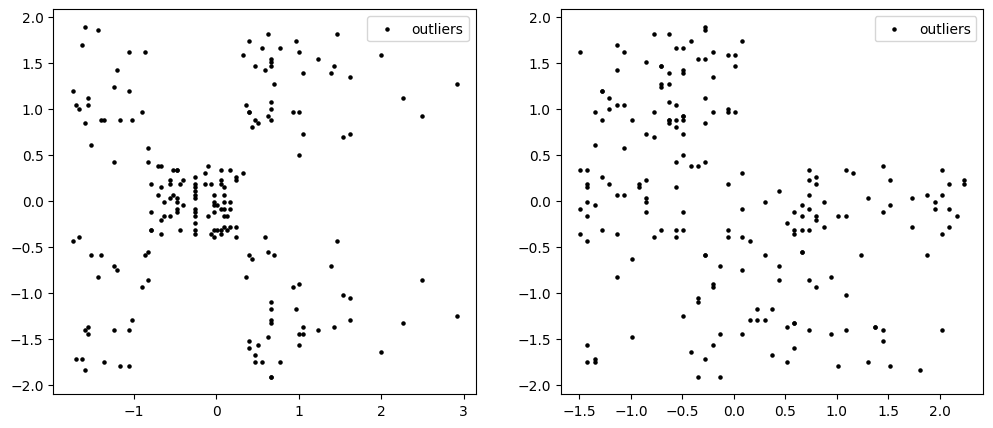

In [32]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()